In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os
os.environ["KAGGLEHUB_CACHE"] = "/Volumes/SecureSSD/Projects/LearningML/kaggle"

In [30]:
path = kagglehub.dataset_download("ishanshrivastava28/superstore-sales")

In [31]:
df = pd.read_csv(path + "/Superstore.csv", encoding="latin1")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [33]:
df.groupby("State")["Profit"].sum().sort_values(ascending=False).head(5)

State
California    76381.3871
New York      74038.5486
Washington    33402.6517
Michigan      24463.1876
Virginia      18597.9504
Name: Profit, dtype: float64

In [34]:
df.groupby("Region")["Customer ID"].count()

Region
Central    2323
East       2848
South      1620
West       3203
Name: Customer ID, dtype: int64

In [35]:
df.groupby(["Customer ID", "Customer Name"])["Order ID"].count().sort_values(ascending=False).head(1)

Customer ID  Customer Name
WB-21850     William Brown    37
Name: Order ID, dtype: int64

In [36]:
df.groupby("Sub-Category")["Discount"].mean().sort_values(ascending=False).head(1)

Sub-Category
Binders    0.372292
Name: Discount, dtype: float64

In [ ]:
df.groupby(["Product ID", "Product Name"])["Discount"].sum().sort_value s(ascending=False).head(5)

Product ID       Product Name                                             
OFF-BI-10000301  GBC Instant Report Kit                                       6.4
OFF-BI-10004140  Avery Non-Stick Binders                                      6.0
OFF-BI-10003676  GBC Standard Recycled Report Covers, Clear Plastic Sheets    5.9
OFF-BI-10002982  Avery Self-Adhesive Photo Pockets for Polaroid Photos        5.9
OFF-BI-10001658  GBC Standard Therm-A-Bind Covers                             5.8
Name: Discount, dtype: float64

In [38]:
df.groupby("Category")["Sales"].sum().sort_values(ascending=False).head(1)

Category
Technology    836154.033
Name: Sales, dtype: float64

In [39]:
df.groupby("Ship Mode")["Profit"].sum().sort_values(ascending=False).head(1)

Ship Mode
Standard Class    164088.7875
Name: Profit, dtype: float64

In [40]:
df.groupby("Sub-Category")["Profit"].mean().sort_values(ascending=True).head(1)

Sub-Category
Tables   -55.565771
Name: Profit, dtype: float64

In [41]:
df.groupby(["Product ID", "Product Name"])["Profit"].sum().sort_values(ascending=False).head(1)

Product ID       Product Name                         
TEC-CO-10004722  Canon imageCLASS 2200 Advanced Copier    25199.928
Name: Profit, dtype: float64

/var/folders/cv/q639ql4s6nq9dsgbvxsnywgc0000gn/T/ipykernel_36748/2389422340.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_10_products.values, y = top_10_products.index.get_level_values("Product Name"), palette = "coolwarm")


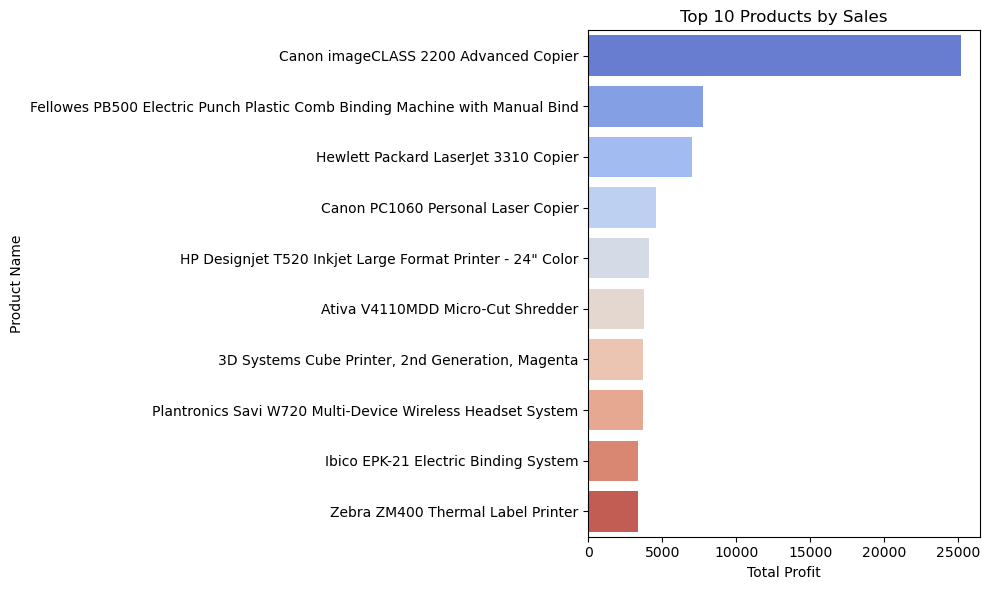

In [42]:
top_10_products = df.groupby(["Product ID", "Product Name"])["Profit"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x = top_10_products.values, y = top_10_products.index.get_level_values("Product Name"), palette = "coolwarm")
plt.title("Top 10 Products by Sales")
plt.xlabel("Total Profit")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

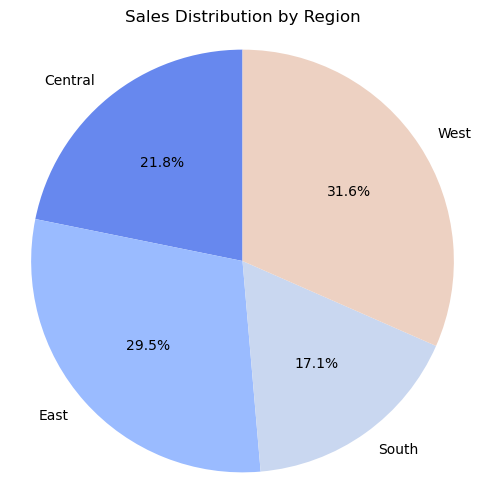

In [43]:
region_sales = df.groupby("Region")["Sales"].sum()

plt.figure(figsize=(6, 6))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=90, colors = sns.color_palette("coolwarm"))
plt.title("Sales Distribution by Region")
plt.axis('equal')
plt.show()